STAT 847 Exploratory Data Analysis

Midterm Project

Hotel Data

Author: Yulin Xue

Student ID: 20949719

In [2]:
install.packages("mice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load data
library(ggplot2)
library('colorspace')
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr) 
library(lubridate)
library(mice)

door <- read.csv("hotel_door.csv")
head(door)

elevator <- read.csv("hotel_elevator.csv")
head(elevator)

frontdesk <- read.csv("hotel_frontdesk.csv")
head(frontdesk)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,guest_id,day_of_door,room_id,floor,room_on_floor,open_success,user_type,timestamp,week,ts_hour,day_of_week
,<int>,<int>,<int>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>
1,1001,0,1403,14,3,TRUE,guest,2018-06-13 17:43:23,1,17,Wed
2,1002,0,1413,14,13,TRUE,guest,2018-06-16 16:21:09,1,16,Sat
3,1003,0,1706,17,6,TRUE,guest,2018-06-14 17:23:38,1,17,Thu
4,1003,1,1706,17,6,TRUE,guest,2018-06-15 12:21:26,1,12,Fri
5,1003,1,1706,17,6,TRUE,guest,2018-06-15 18:18:42,1,18,Fri
6,1003,2,1706,17,6,TRUE,guest,2018-06-16 22:27:01,1,22,Sat


,user_id,room_id,day_of_trip,car,from,to,timestamp,week,day_of_week,ts_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,1001,1403,1,1,1,14,2018-06-13 17:42:47,1,Wed,17
2,1001,1403,2,1,14,1,2018-06-14 07:57:07,1,Thu,7
3,1002,1413,1,1,1,14,2018-06-16 16:20:43,1,Sat,16
4,1002,1413,2,1,14,1,2018-06-17 09:08:48,1,Sun,9
5,1003,1706,1,1,1,17,2018-06-14 17:23:06,1,Thu,17
6,1003,1706,2,3,17,1,2018-06-15 10:24:06,1,Fri,10


,guest_id,in_timestamp,out_timestamp,length_of_stay,room_id,floor,room_on_floor,days_booked_ago,price,week,in_day_of_week,out_day_of_week,in_ts_hour,out_ts_hour
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>
1,1001,2018-06-13 17:34:15,2018-06-14 08:05:11,1,1403,14,3,13,497.99,1,Wed,Thu,17,8
2,1002,2018-06-16 16:12:02,2018-06-17 09:18:35,1,1413,14,13,18,492.76,1,Sat,Sun,16,9
3,1003,2018-06-14 17:14:29,2018-06-20 10:15:39,6,1706,17,6,21,2289.49,1,Thu,Wed,17,10
4,1004,2018-06-16 16:56:51,2018-06-19 08:07:38,3,711,7,11,22,740.18,1,Sat,Tue,16,8
5,1005,2018-06-14 14:28:00,2018-06-17 08:43:21,3,230,2,30,13,383.12,1,Thu,Sun,14,8
6,1006,2018-06-16 16:39:58,2018-06-18 08:41:07,2,1629,16,29,24,1003.84,1,Sat,Mon,16,8


# Missing Data:

## NMAR: 

There are 600 missing data in day_of_door of hotel_door.csv which is Not Missing At Random. Below is the result of some investigation. As can be seen, on 06-25, guest 1024 tried to open the door of every room in the hotel, but was denied. The day_of_door is NA because he/she is not a customer at 06-25. According to hotel_frontdesk.csv, guest 1024 checked in on 06-13 and checked out on 06-15. There is no record for him/she to use the elevator at 06-25, it seems that he took stairs. This is a security flaws, a customer can come back to hotel and try to break into other room. It is a good idea to have some security to check people's check-in information before they are allowed to enter stairs.

Will delete these data, since there is not much other useful information in it.

,guest_id,open_success,user_type,timestamp,week,ts_hour,day_of_week,room_id,floor,room_on_floor,day_of_door,
7214,1,1,1,1,1,1,1,1,1,1,1,0
600,1,1,1,1,1,1,1,1,1,1,0,1
176,1,1,1,1,1,1,1,0,0,0,1,3
,0,0,0,0,0,0,0,176,176,176,600,1128


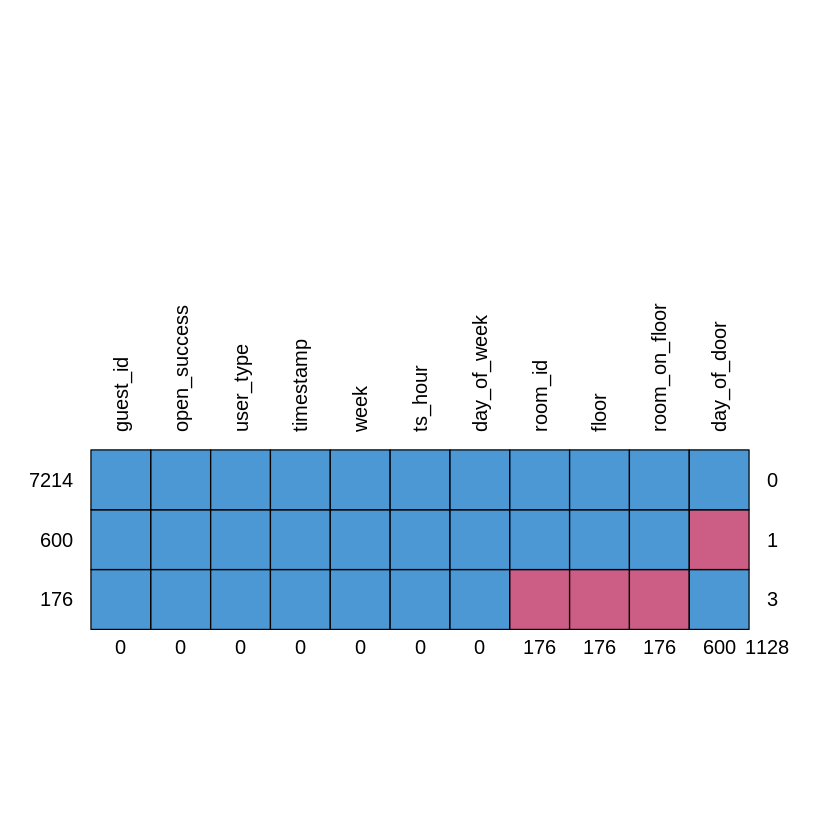

In [ ]:
md.pattern(door, rotate.names = TRUE)

In [ ]:
head(door[is.na(door$day_of_door), ])

,guest_id,day_of_door,room_id,floor,room_on_floor,open_success,user_type,timestamp,week,ts_hour,day_of_week
,<int>,<int>,<int>,<int>,<int>,<lgl>,<chr>,<chr>,<int>,<int>,<chr>
957,1024,NA,101,1,1,FALSE,guest,2018-06-25 12:01:15,2,12,Mon
958,1024,NA,102,1,2,FALSE,guest,2018-06-25 12:02:23,2,12,Mon
959,1024,NA,103,1,3,FALSE,guest,2018-06-25 12:02:52,2,12,Mon
960,1024,NA,104,1,4,FALSE,guest,2018-06-25 12:03:33,2,12,Mon
961,1024,NA,105,1,5,FALSE,guest,2018-06-25 12:03:58,2,12,Mon
962,1024,NA,106,1,6,FALSE,guest,2018-06-25 12:05:13,2,12,Mon


In [ ]:
summary(door[is.na(door$day_of_door), ])

    guest_id     day_of_door     room_id           floor       room_on_floor 
 Min.   :1024   Min.   : NA   Min.   : 101.0   Min.   : 1.00   Min.   : 1.0  
 1st Qu.:1024   1st Qu.: NA   1st Qu.: 583.2   1st Qu.: 5.75   1st Qu.: 8.0  
 Median :1024   Median : NA   Median :1065.5   Median :10.50   Median :15.5  
 Mean   :1024   Mean   :NaN   Mean   :1065.5   Mean   :10.50   Mean   :15.5  
 3rd Qu.:1024   3rd Qu.: NA   3rd Qu.:1547.8   3rd Qu.:15.25   3rd Qu.:23.0  
 Max.   :1024   Max.   : NA   Max.   :2030.0   Max.   :20.00   Max.   :30.0  
                NA's   :600                                                  
 open_success     user_type          timestamp              week  
 Mode :logical   Length:600         Length:600         Min.   :2  
 FALSE:600       Class :character   Class :character   1st Qu.:2  
                 Mode  :character   Mode  :character   Median :2  
                                                       Mean   :2  
                                         

In [ ]:
frontdesk[frontdesk$guest_id == 1024, ]

,guest_id,in_timestamp,out_timestamp,length_of_stay,room_id,floor,room_on_floor,days_booked_ago,price,week,in_day_of_week,out_day_of_week,in_ts_hour,out_ts_hour,price_night
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<dbl>
24,1024,2018-06-13 17:47:14,2018-06-15 07:56:52,2,504,5,4,14,386.36,1,Wed,Fri,17,7,193.18


## MAR:
There are 17 customers does not have room_id, floor, room_on_floor record in all the dataset. What those 17 customers have in common is that they all paid a lot for the price/night. The average price they paid is \$705 while the overall average price is only \$371. As can be seen from the histogram below, those 17 customers tend to pay a higher price.

It is also worth noting that they all have a relatively long length_of_stay and they come to hotel at week 3 and week 8, tend to left hotel at Wed.

Classified as MAR, since the missing data has something in common

Will delete these data when the analysis is related to the room_id, floor, room_on_floor, since it does not make sense to impute room_id. Will keep these data if the analysis is not related to them (e.g. price, week).

[1] 371.8311

[1] 704.6052

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


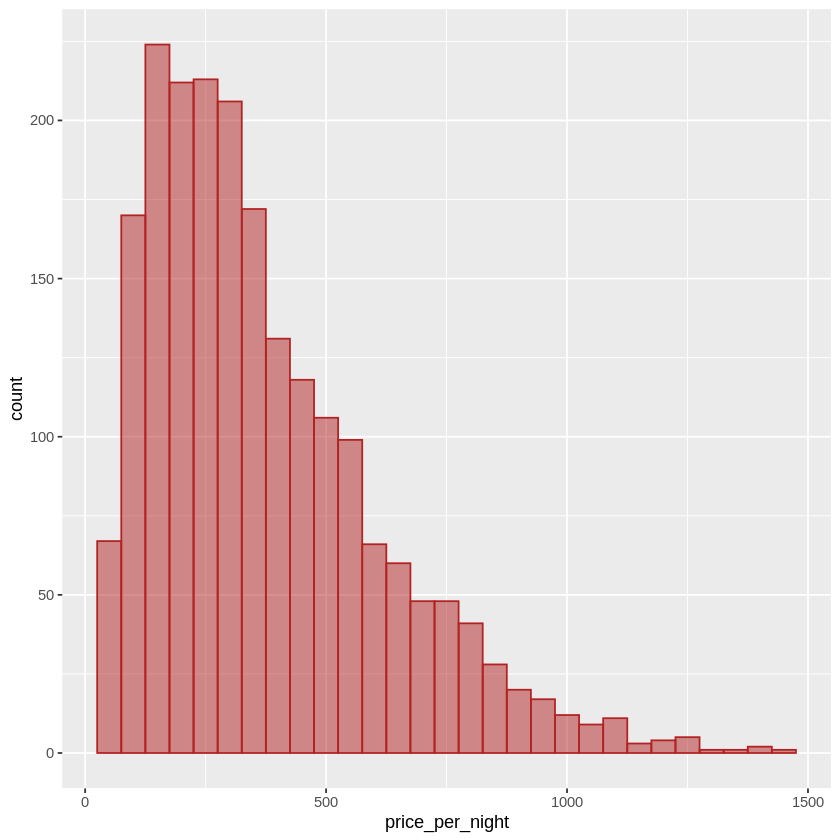

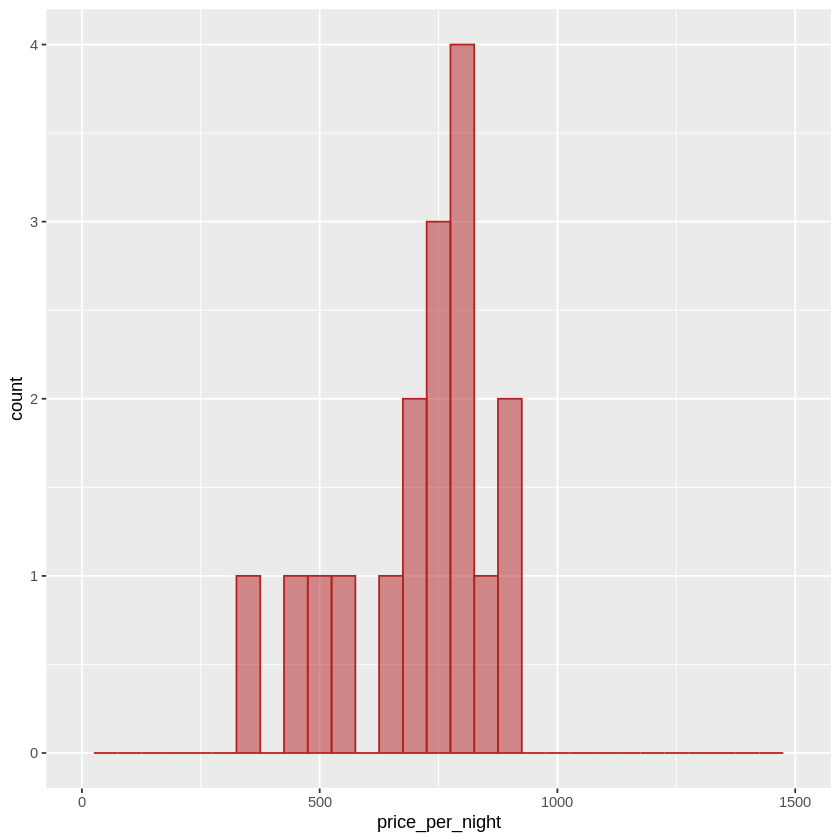

In [12]:
frontdesk$price_per_night <- frontdesk$price / frontdesk$length_of_stay
frontdesk_room <- frontdesk[is.na(frontdesk$room_id), ]
mean(frontdesk$price_per_night)
mean(frontdesk_room$price_per_night)
ggplot(frontdesk, aes(x = price_per_night )) +
  geom_histogram(color = "firebrick", fill = "firebrick",  alpha = 0.5, binwidth = 50)
ggplot(frontdesk_room, aes(x = price_per_night )) +
  geom_histogram(color = "firebrick", fill = "firebrick",  alpha = 0.5, binwidth = 50) +
  xlim(0,1500)

,guest_id,in_timestamp,out_timestamp,length_of_stay,days_booked_ago,price,week,in_day_of_week,out_day_of_week,in_ts_hour,out_ts_hour,price_night,room_id,floor,room_on_floor,
2078,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
17,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,3
,0,0,0,0,0,0,0,0,0,0,0,0,17,17,17,51


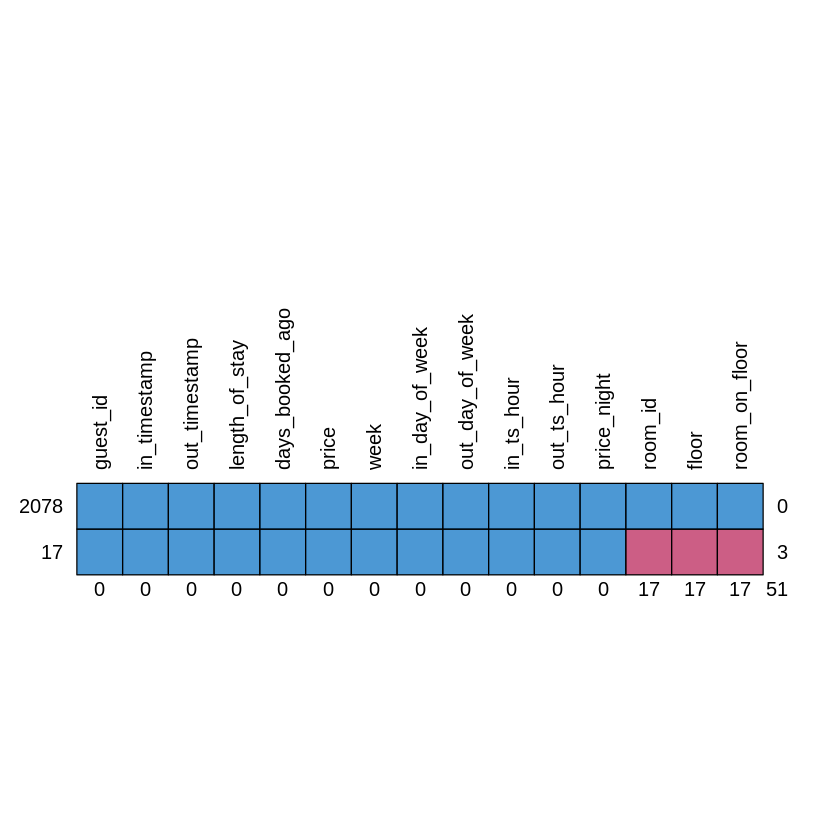

In [ ]:
md.pattern(frontdesk, rotate.names = TRUE)

In [ ]:
# Missing room_id, floor, room_on_floor
summary(frontdesk[is.na(frontdesk$room_id),  ]$length_of_stay)
# Regular customer
summary(frontdesk$length_of_stay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   4.000   5.000   5.118   6.000   7.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.296   3.000   7.000 

# Combine the information
I would left-join to the database I want to analyze. For example, when I analyzed how long it take from check-in to room with respect to floor. I performed a left-join to combine hotel_door.csv and hotel_frontdesk.csv by using guest_id as key. As a result, I can have check-in time and open-door time on the same row to calculate how long it take from frontdesk to door. It is kind of strange that floor does not affect time. A reasonable assumption is that the speed of elevator is fast and not very busy,customers living on high floors does not suffer from the frequent stop on low floor.

,guest_id,day_of_door,open_success,timestamp,ts_hour,day_of_week,in_timestamp,out_timestamp,length_of_stay,room_id,⋯,room_on_floor,days_booked_ago,price,week,in_day_of_week,out_day_of_week,in_ts_hour,out_ts_hour,price_night,travelTimeInHotel
,<int>,<int>,<lgl>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,1001,0,TRUE,2018-06-13 17:43:23,17,Wed,2018-06-13 17:34:15,2018-06-14 08:05:11,1,1403,⋯,3,13,497.99,1,Wed,Thu,17,8,497.9900,9
2,1002,0,TRUE,2018-06-16 16:21:09,16,Sat,2018-06-16 16:12:02,2018-06-17 09:18:35,1,1413,⋯,13,18,492.76,1,Sat,Sun,16,9,492.7600,9
3,1003,0,TRUE,2018-06-14 17:23:38,17,Thu,2018-06-14 17:14:29,2018-06-20 10:15:39,6,1706,⋯,6,21,2289.49,1,Thu,Wed,17,10,381.5817,9
4,1004,0,TRUE,2018-06-16 17:05:01,17,Sat,2018-06-16 16:56:51,2018-06-19 08:07:38,3,711,⋯,11,22,740.18,1,Sat,Tue,16,8,246.7267,9
5,1005,0,TRUE,2018-06-14 14:37:56,14,Thu,2018-06-14 14:28:00,2018-06-17 08:43:21,3,230,⋯,30,13,383.12,1,Thu,Sun,14,8,127.7067,9
6,1006,0,TRUE,2018-06-16 16:48:23,16,Sat,2018-06-16 16:39:58,2018-06-18 08:41:07,2,1629,⋯,29,24,1003.84,1,Sat,Mon,16,8,501.9200,9


Warning message:
“Removed 17 rows containing missing values (stat_boxplot).”


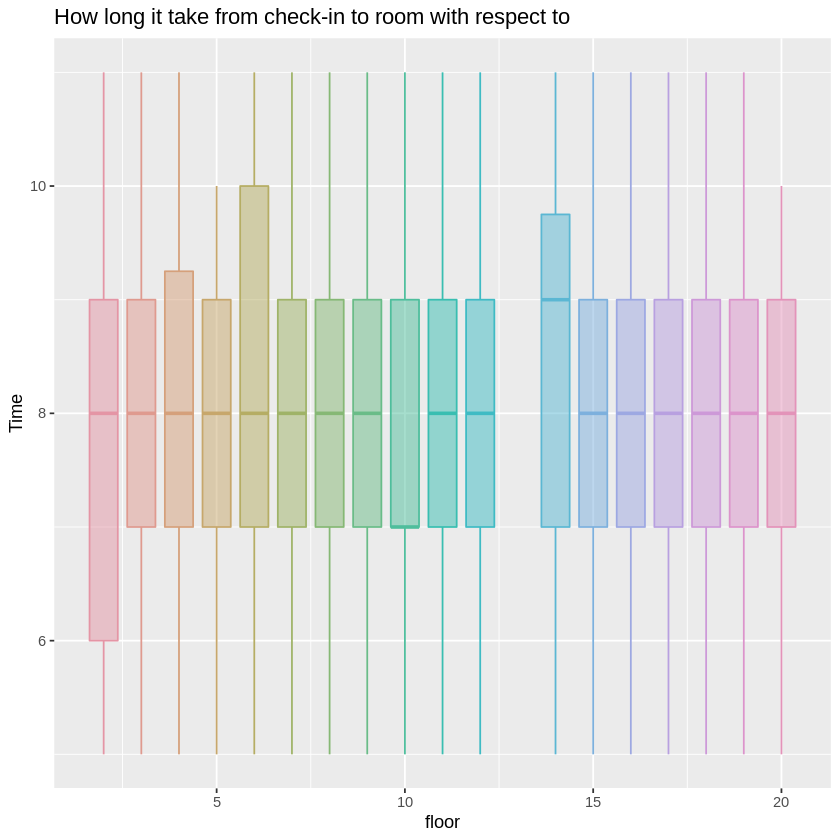

In [ ]:
# door2 <- na.omit(door)

door2 <- door %>% 
  select(-room_id, -floor, -room_on_floor, -user_type, -week) %>%
  filter(day_of_door == 0) %>%
  left_join(frontdesk, by = "guest_id")

checkInTime <- as.POSIXlt(door2$in_timestamp)
InRoomTime <- as.POSIXlt(door2$timestamp)
door2$travelTimeInHotel <- minute(InRoomTime) - minute(checkInTime) + 60*(hour(InRoomTime) - hour(checkInTime))

head(door2)

cols <- rainbow_hcl(18)
ggplot(data = door2, mapping = aes(group=floor, x=floor, y=travelTimeInHotel)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Time") + 
    ggtitle("How long it take from check-in to room with respect to")

# Story

## Lock issue in Room 404
Room 404 has potential security flaw, there are 3 customers(guest id: 2022, 10164, 13085) choose room 404. During their stay, they were often unable to open the lock. On average, there is only 1 successful unlock in every 4 attempts for room 404. Need to send someone to check the lock of Room 404.

In [ ]:
door404 <- door[door$room_id==404 & !is.na(door$room_id) & door$guest_id!=1024, ]
table(door404$open_success, door404$guest_id)

       
        2022 10164 13085
  FALSE   30    12     1
  TRUE     5     5     1

## Price
As can be seen below:

It seems that hotel will offer a discount for those customer who is going to stay longer, the price per night will decrease as the length of stay increased.

The price of higher floor is more expensive

The price in week 3 is the most expensive and last 2 weeks are most economical.

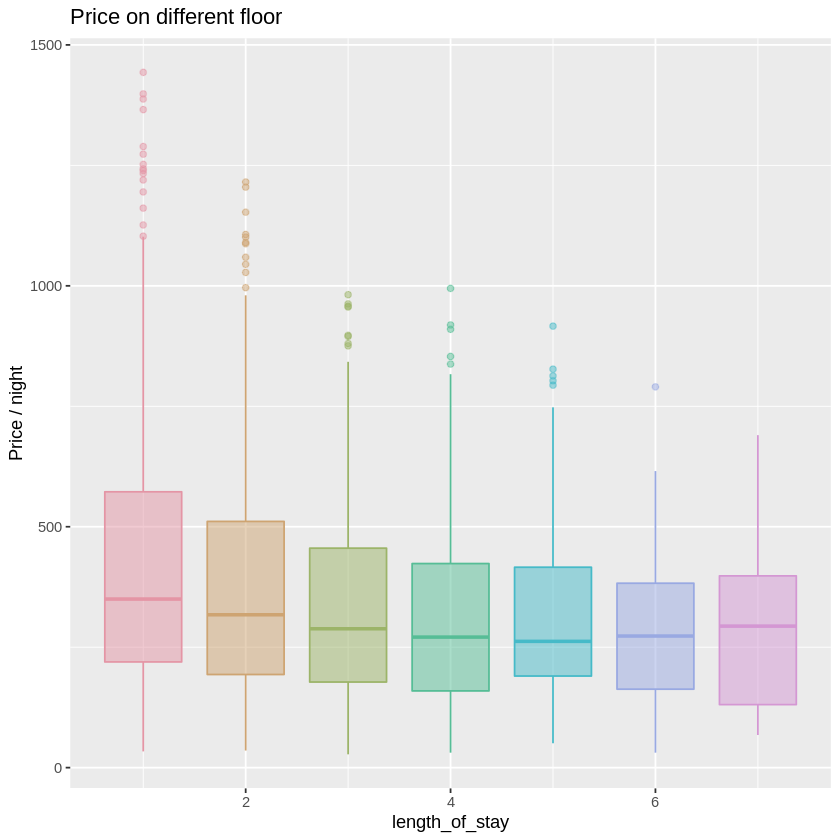

In [26]:
cols <- rainbow_hcl(7)
ggplot(data = frontdesk, mapping = aes(group=length_of_stay, x=length_of_stay, y=price / length_of_stay)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Price / night") + 
    ggtitle("Price on different floor")

Warning message:
“Removed 17 rows containing missing values (stat_boxplot).”


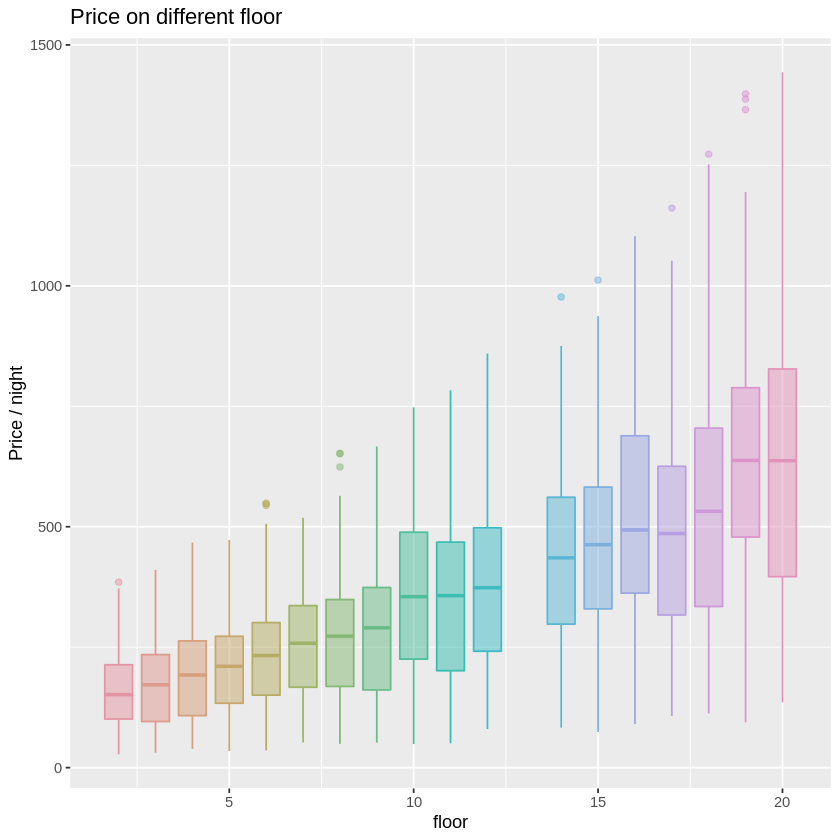

In [27]:
cols <- rainbow_hcl(18)
ggplot(data = frontdesk, mapping = aes(group=floor, x=floor, y=price / length_of_stay)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Price / night") + 
    ggtitle("Price on different floor")

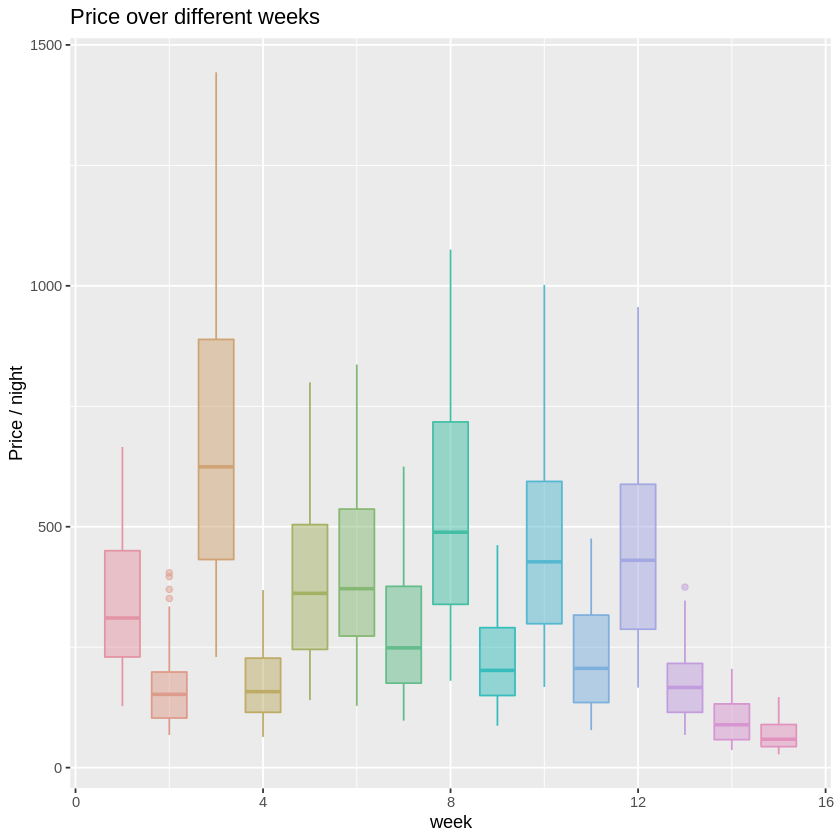

In [28]:
cols <- rainbow_hcl(15)
ggplot(data = frontdesk, mapping = aes(group=week, x=week, y=price/length_of_stay)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Price / night") + 
    ggtitle("Price over different weeks")

## Hotel Occupancy
Overall, the hotel occupancy is 8.8%

In [ ]:
sum(frontdesk$length_of_stay) / 54810

[1] 0.08777595

8th floor and 18th floor is very popular than other floor with the occupancy of 15%. It is worth noting that it is not because the customers in 8th and 18th floor tend to stay longer. More customers have the preference for these floor, even the price of floor 18th is much more expensive as we discussed at price section, customer still willing to choose 18th floor

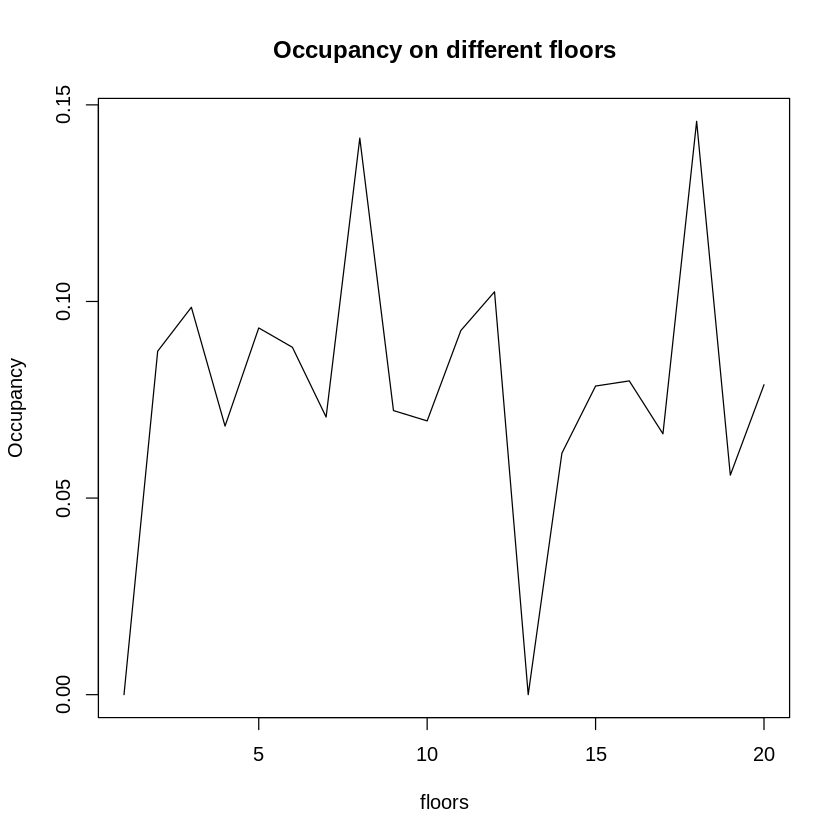

In [ ]:
floors <- seq(1,20)
room_taken_percent <- rep(-1, 20)
for (floor in floors){
  frontdesk_floor <- frontdesk[frontdesk$floor == floor & !is.na(frontdesk$floor), ]
  room_taken <- sum(frontdesk_floor$length_of_stay)
  room_taken_percent[floor] = room_taken / (29*7*15)
}
plot(floors, room_taken_percent, type = "l", ylab = "Occupancy", main = "Occupancy on different floors")

There are a lot customer came to hotel at week 3, with the occupancy of 15%, which is the peak of summer. On the other hand, at the end of last two weeks, fewer customer came to hotel, where the occupancy is only 3.8% and 3.2%. 

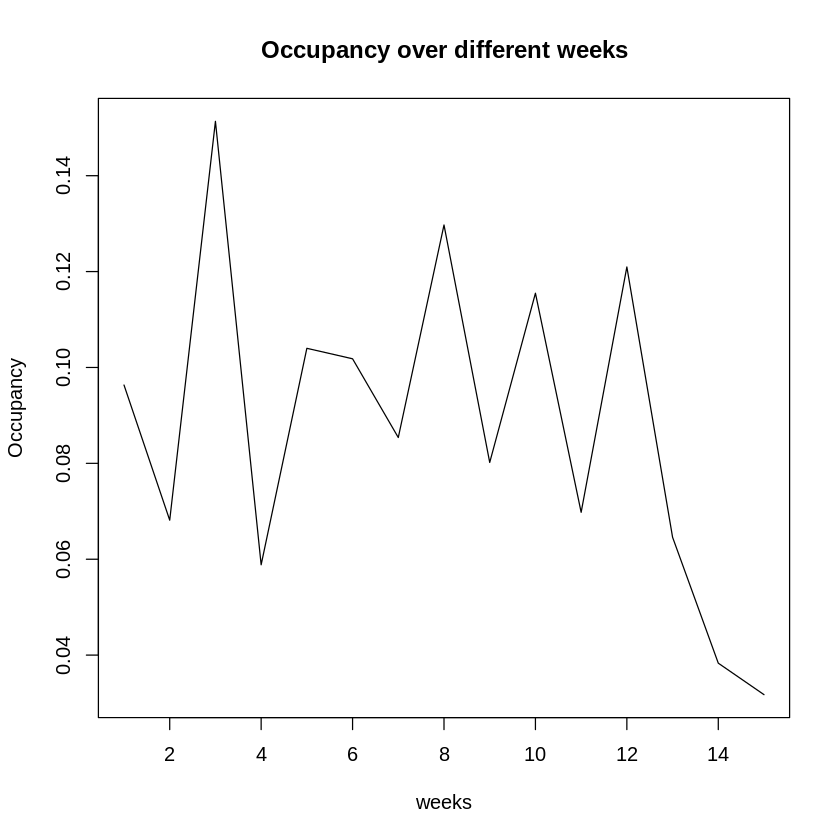

In [ ]:
weeks <- seq(1,15)
room_taken_percent <- rep(-1, 15)
for (week in weeks){
  frontdesk_week <- frontdesk[frontdesk$week == week, ]
  room_taken <- sum(frontdesk_week$length_of_stay)
  room_taken_percent[week] = room_taken / (29*18*7)
}
plot(weeks, room_taken_percent, type = "l", ylab = "Occupancy", main = "Occupancy over different weeks")

## Book in advanced
Overall, customers books 20 days in advance, from the data this summer, customer booked at least 7 days in advance, at most 36 days in advance

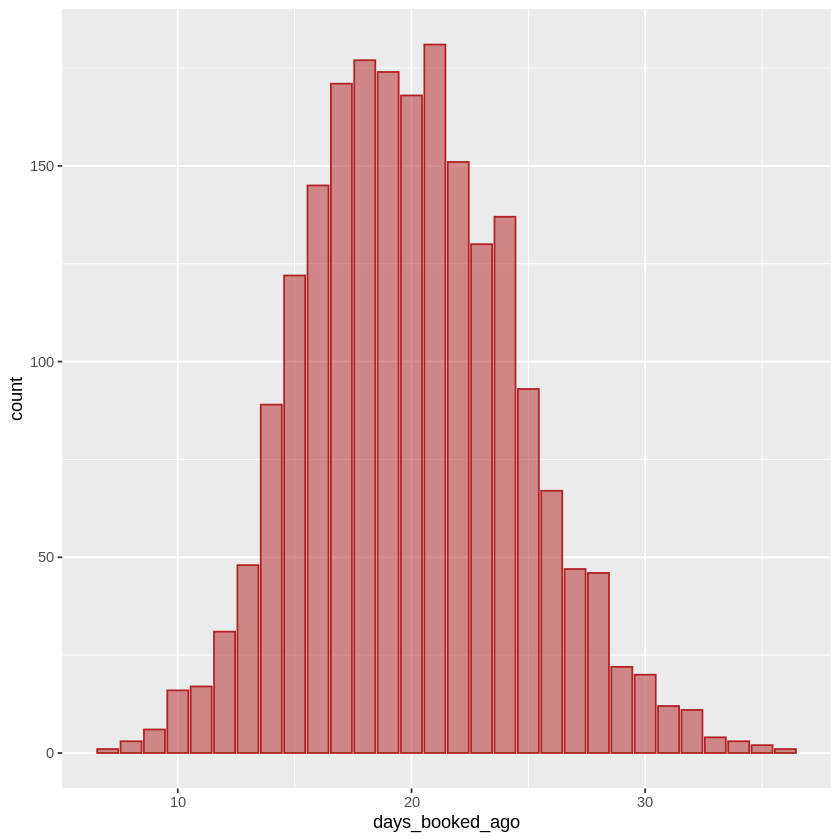

In [ ]:
ggplot(frontdesk, aes(x = days_booked_ago )) +
  geom_bar(color = "firebrick", fill = "firebrick",  alpha = 0.5)

## Check-in date and time
Check-in is only available from Wednesdat to Saturday each week, 12:00 - 23:00 each day, check-out is available every day and 6:00-12:00 each day. Most customers check in on Saturday and most customers check out on Sunday. Weekend is a very busy for the frontdesk, especially the check-in service around 17:30 and check-out service 8:00-9:59

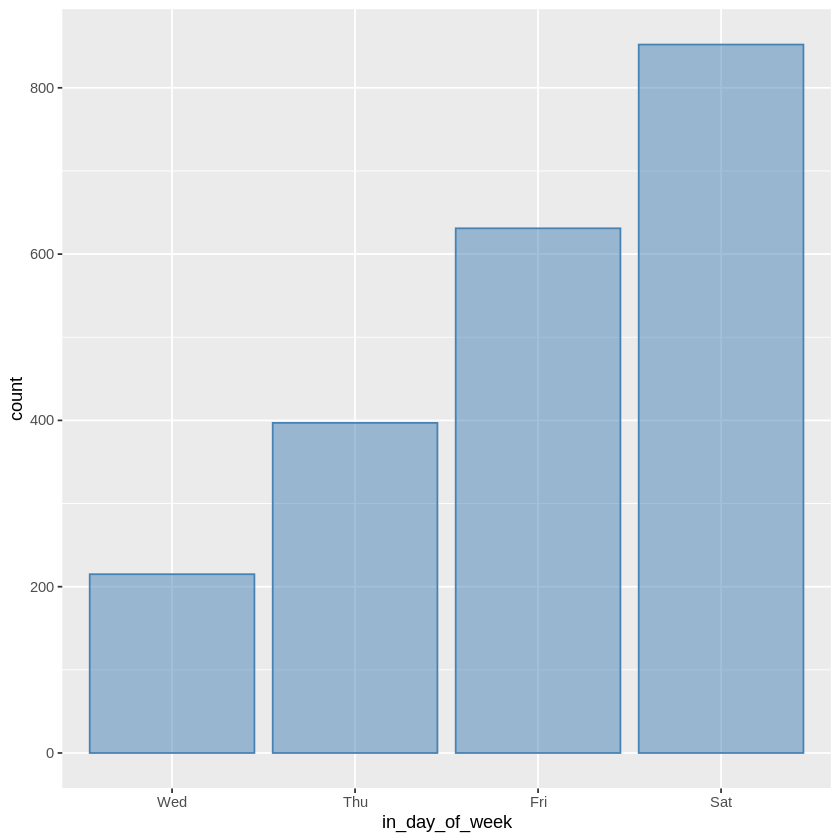

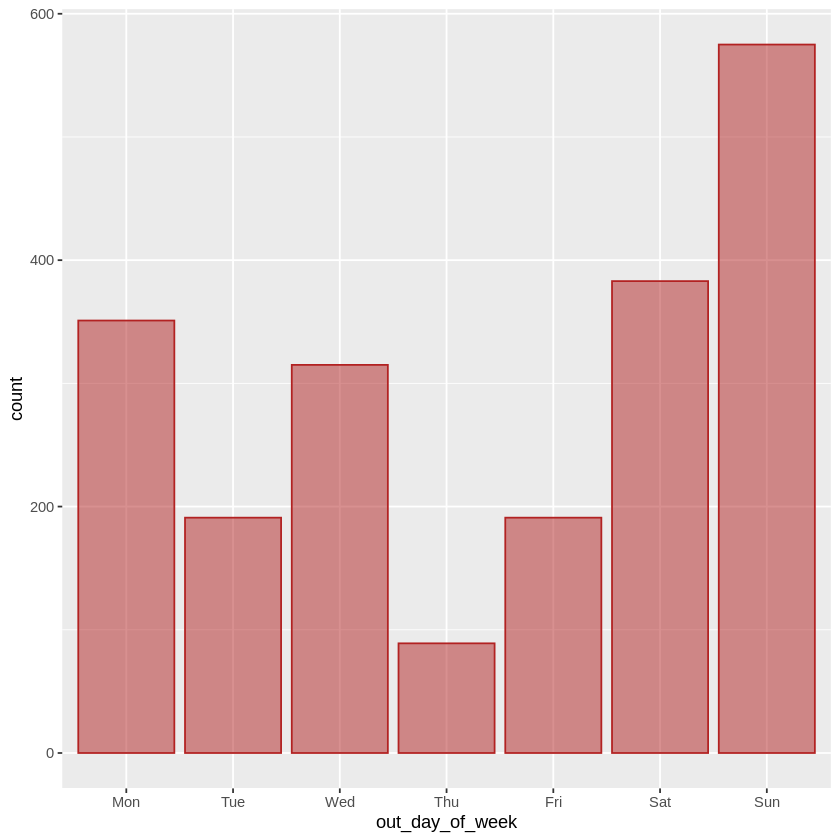

In [ ]:
ggplot(frontdesk, aes(x = in_day_of_week)) +
  geom_bar(color = "steelblue", fill = "steelblue",  alpha = 0.5)

ggplot(frontdesk, aes(x = out_day_of_week)) +
  geom_bar(color = "firebrick", fill = "firebrick",  alpha = 0.5)

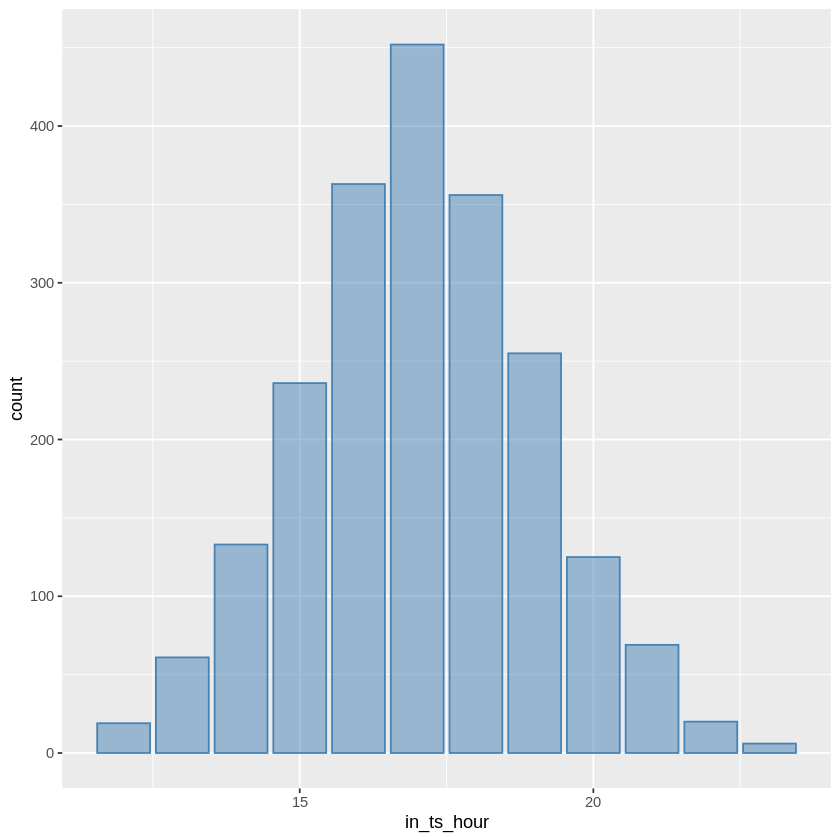

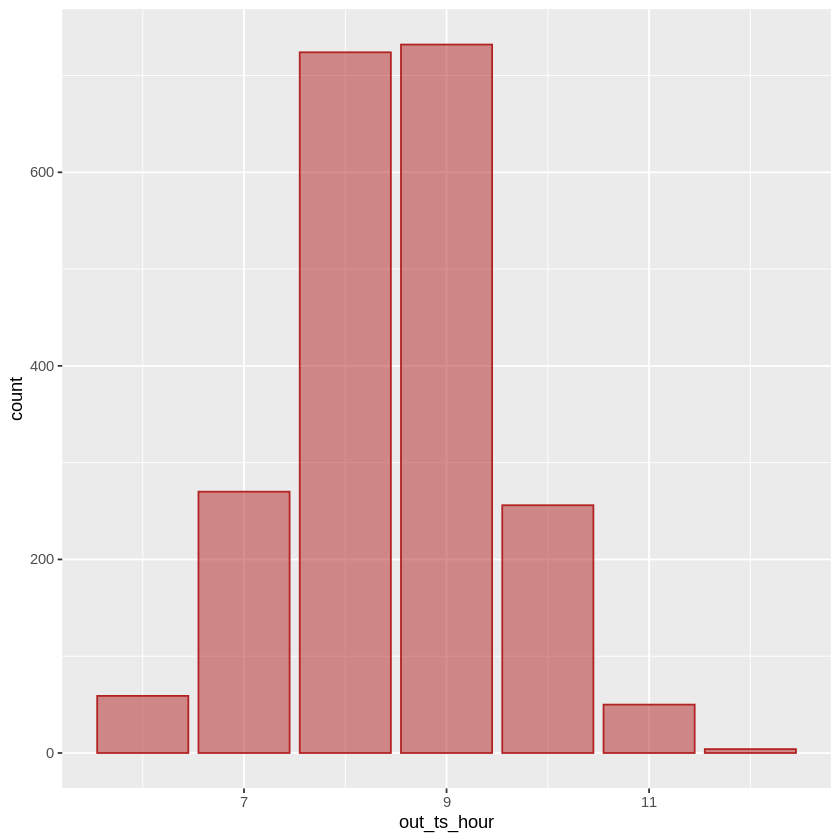

In [ ]:
ggplot(frontdesk, aes(x = in_ts_hour)) +
  geom_bar(color = "steelblue", fill = "steelblue",  alpha = 0.5)

ggplot(frontdesk, aes(x = out_ts_hour)) +
  geom_bar(color = "firebrick", fill = "firebrick",  alpha = 0.5)

## Room and Floor availability
1st and 13th floor and Room 01 on each floor is not available for customers. But it does exist, 06-25 guest 1024 tried to break into the 30 rooms on 1st and 13th floor and Room 01 on each floor. However, those room are never open for customers. As a result, there are 18 floors and 29 rooms on each floor available, so there are 522 rooms available for customers each day.

Warning message:
“Removed 176 rows containing non-finite values (stat_count).”


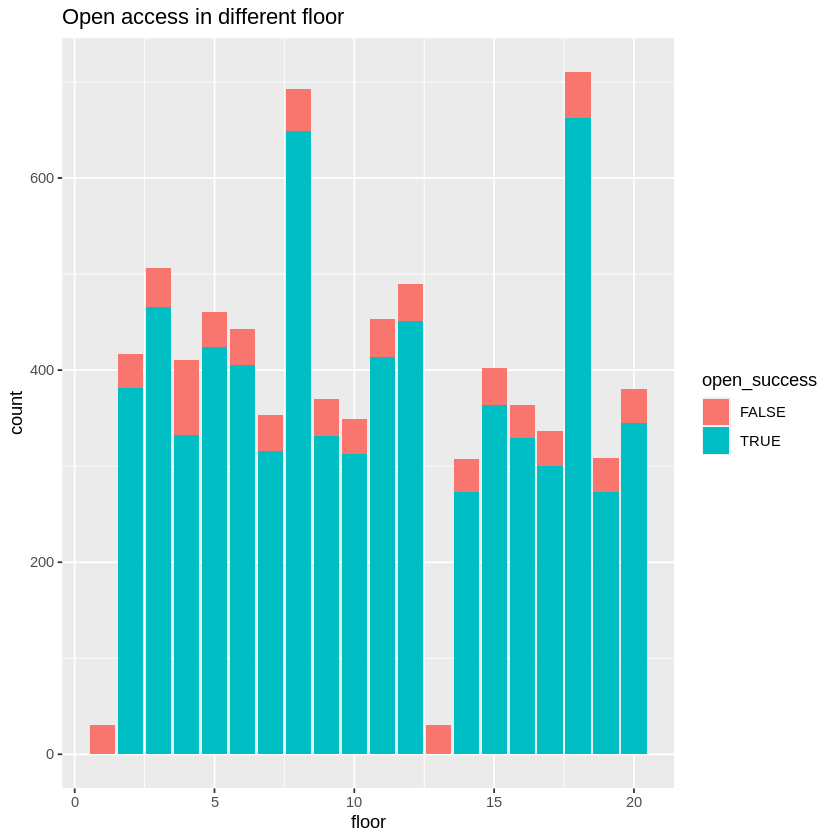

In [ ]:
ggplot(data = door, mapping = aes(fill=open_success, x=floor)) + 
    geom_bar() +  
    ggtitle("Open access in different floor")

## Length of Stay
Customers stay at the hotel for a maximum of 7 nights. And all customers who stay at the hotel for seven nights are checking in on Wednesday.

In [ ]:
table(frontdesk$length_of_stay, frontdesk$in_day_of_week)

   
    Wed Thu Fri Sat
  1  89 151 245 348
  2  40 103 156 199
  3  35  48 101 114
  4  23  42  51 191
  5   9  20  78   0
  6   6  33   0   0
  7  13   0   0   0

## Elevator and door
It seems that all the customers are taking elevators to their floor, since the number of successful door open is exactly twice as number of elevator(up and down).

On the first day, all the customer only unlock their rooms once, which means after they arrived to their rooms, they never left their rooms on the first day. I guess people want to rest on the first day of the long journey to the hotel.

On the rest of the day in hotel, on average people enter and leave their rooms twice a day

In [29]:
nrow(elevator)
door2 <- door[door$open_success == "TRUE", ]
nrow(door2)

[1] 14398

[1] 7199

In [32]:
# Length of unique list has the same length with not unique list, means every id only appears once
door_day1 <- door[door$open_success == "TRUE" & door$day_of_door == 0, ]
length(unique(door_day1$guest_id))
length(door_day1$guest_id)
nrow(frontdesk)

[1] 2095

[1] 2095

[1] 2095

In [33]:
door_success <- door[door$open_success == "TRUE", ]
table(door_success$day_of_door)
table(frontdesk$length_of_stay)
# Use the result of table to calculate
stay_at_dayX <- c(2095, 1262, 764, 466, 159, 52, 13)
stay_at_dayX


   0    1    2    3    4    5    6 
2095 2355 1406  917  301  104   21 


  1   2   3   4   5   6   7 
833 498 298 307 107  39  13 

[1] 2095 1262  764  466  159   52   13

# Error in dataset
Length_of_stay means how many night a customer stay at the hotel, while day_of_trip means the day they use elevator. Therefore, if a customer paid for 7 night, the last day_of_trip should be 8. However, in elevator dataset, the last day_of_trip is 1(an example is shown below).

This error occurs when the length_of_stay > 1

In [ ]:
# day of trip
table(elevator$day_of_trip)
# length of stay
table(frontdesk$length_of_stay)


   1    2    3    4    5    6    7 
3357 5543 2812 1834  602  208   42 


  1   2   3   4   5   6   7 
833 498 298 307 107  39  13 

In [ ]:
elevator[elevator$user_id == 1004, ]

,user_id,room_id,day_of_trip,car,from,to,timestamp,week,day_of_week,ts_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>
27,1004,711,1,3,1,7,2018-06-16 17:04:26,1,Sat,17
28,1004,711,2,1,7,1,2018-06-17 08:15:38,1,Sun,8
29,1004,711,2,2,1,7,2018-06-17 12:42:43,1,Sun,12
30,1004,711,2,3,7,1,2018-06-17 17:24:20,1,Sun,17
31,1004,711,2,1,1,7,2018-06-17 21:00:54,1,Sun,21
32,1004,711,3,2,7,1,2018-06-18 09:26:42,1,Mon,9
33,1004,711,3,1,1,7,2018-06-18 19:35:19,1,Mon,19
34,1004,711,1,2,7,1,2018-06-19 07:59:12,1,Tue,7


# Build a model to describe and predict hotel prices
If a customers spend one night on hotel at 1st floor, week 1, the price will be \$74(-212 + 258 + 55 - 27). 

Generally speaking, when the customer choose to spend an extra night, the price will go up by \$258. 

When the customer choose to increase the floor by 1, the price will increase by \$55. 

When a customer chooses to come to the hotel a week later, the price will be reduced by \$27.

The Multiple R-squared is 0.5907, the model performs pretty good

In [ ]:
model <- lm(price ~ length_of_stay + floor + week, data=frontdesk)
summary(model)


Call:
lm(formula = price ~ length_of_stay + floor + week, data = frontdesk)

Residuals:
     Min       1Q   Median       3Q      Max 
-1231.95  -248.95    -2.86   219.81  2251.84 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -212.624     28.440  -7.476 1.12e-13 ***
length_of_stay  258.332      6.285  41.105  < 2e-16 ***
floor            54.817      1.541  35.568  < 2e-16 ***
week            -26.835      2.192 -12.242  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 393.8 on 2074 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.5907,	Adjusted R-squared:  0.5901 
F-statistic: 997.7 on 3 and 2074 DF,  p-value: < 2.2e-16


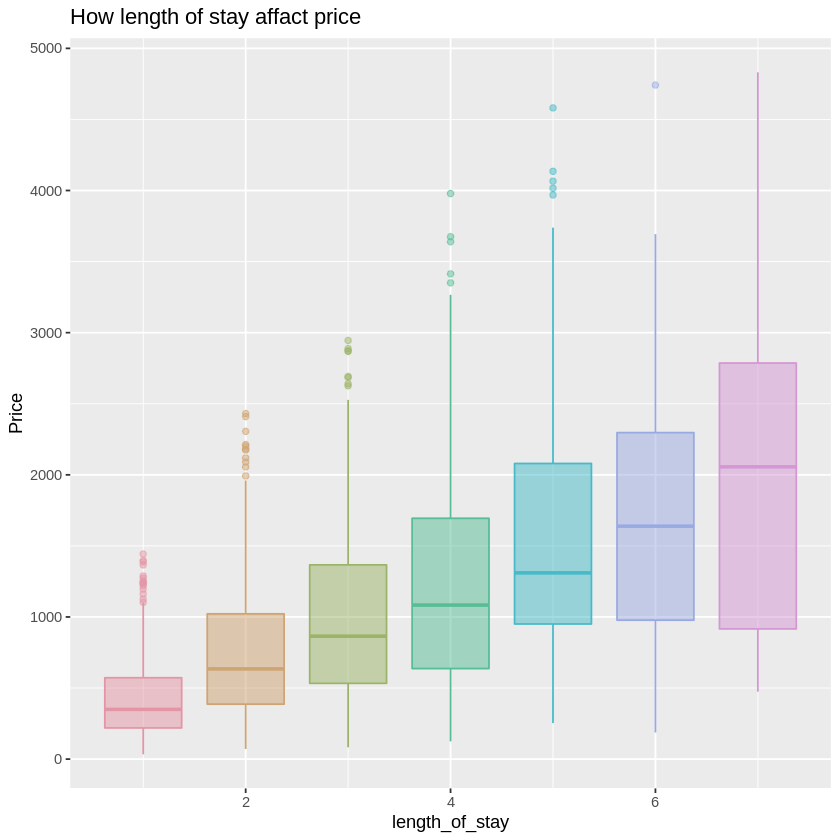

In [ ]:
cols <- rainbow_hcl(7)
ggplot(data = frontdesk, mapping = aes(group=length_of_stay, x=length_of_stay, y=price)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Price") +
    ggtitle("How length of stay affact price")

# Build a model to describe and predict lengths of stay 

It is hard to describe the model with specific number, since they are all very small. According to z-value, the price_per_night is the most important predictor for length of stay. 

When the price_per_night increase, the length of stay decrease. As we discuss before, hotel will offer a discount if the customer stay longer.

When the floor gets higher, the length of stay increase. 

Approching to the end of summer, the length of stay decrease.

In [22]:
model <- glm(length_of_stay ~ floor + week + price_per_night, data=frontdesk, family = "poisson")
summary(model)

# McFadden's R-squared
r <- 1 - model$deviance / model$null.deviance
r


Call:
glm(formula = length_of_stay ~ floor + week + price_per_night, 
    family = "poisson", data = frontdesk)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3755  -0.8248  -0.2475   0.5570   2.6218  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      9.999e-01  4.326e-02  23.115  < 2e-16 ***
floor            1.998e-02  3.322e-03   6.015  1.8e-09 ***
week            -9.881e-03  3.765e-03  -2.624  0.00868 ** 
price_per_night -9.086e-04  8.689e-05 -10.457  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 1617.6  on 2077  degrees of freedom
Residual deviance: 1503.0  on 2074  degrees of freedom
  (17 observations deleted due to missingness)
AIC: 6878.1

Number of Fisher Scoring iterations: 4


[1] 0.07083045

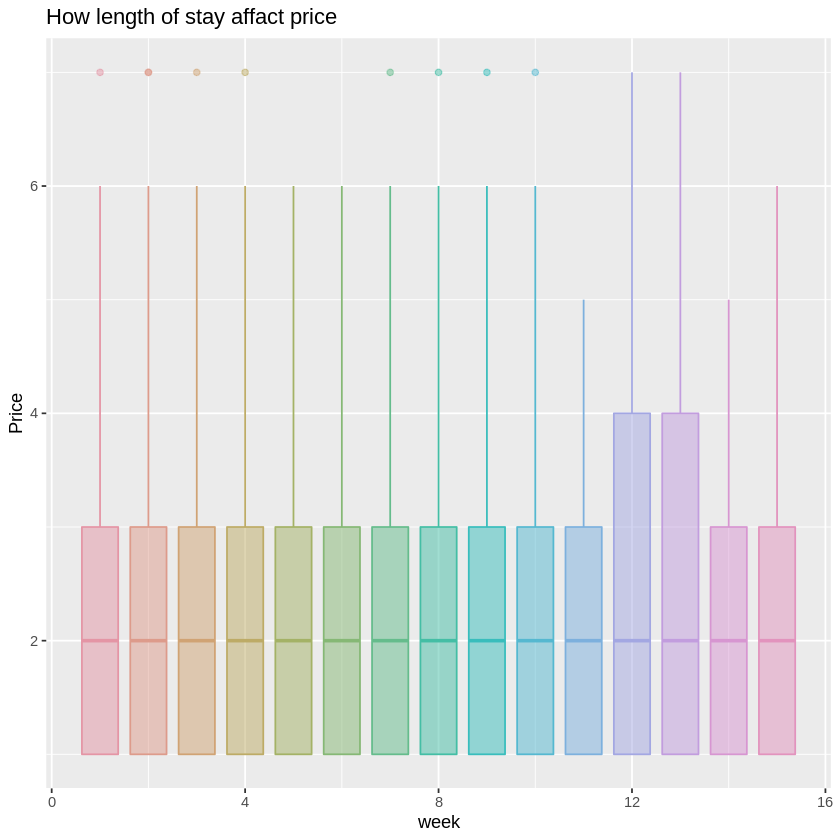

In [ ]:
cols <- rainbow_hcl(15)
ggplot(data = frontdesk, mapping = aes(group=week, x=week, y=length_of_stay)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Length of stay") +
    ggtitle("How week affact length of stay")

Warning message:
“Removed 17 rows containing missing values (stat_boxplot).”


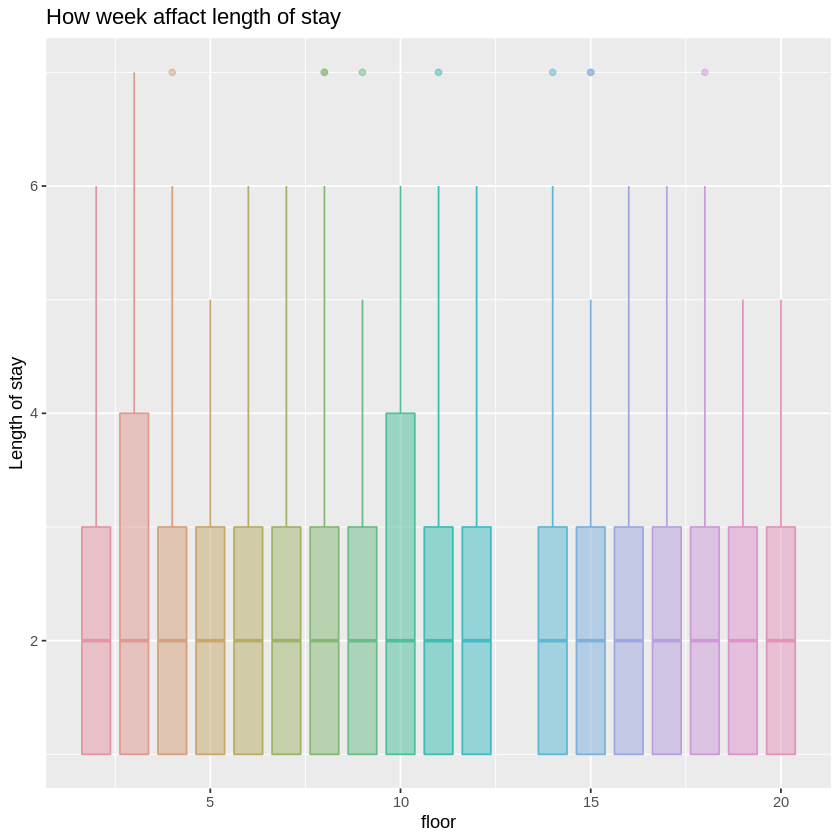

In [ ]:
cols <- rainbow_hcl(18)
ggplot(data = frontdesk, mapping = aes(group=floor, x=floor, y=length_of_stay)) + 
    geom_boxplot(color = cols, fill = cols, alpha = 0.5) + 
    ylab("Length of stay") +
    ggtitle("How week affact length of stay")

# What else I might want to do:
I wish to do more anlysis about elevator, because I think the hotel actually does not need 3 elevator to work all the time. For some period(e.g. week 15), 2 elevator might be enough, but I need more data.

For example, how long did it take from pressing the button until the elevator arrived. How long did it take from current floor to target floor.

Then I can make an anlysis about when we can turn off one elevator maybe (e.g. week x or from 11:00pm - 11:59pm)